In [ ]:
#Output variable -> y
#y -> Whether the client has subscribed a term deposit or not 
#Binomial ("yes" or "no")

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
bank=pd.read_csv('/content/sample_data/bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank.dropna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
bank['y']=le.fit_transform(bank['y'])

In [ ]:
x=bank.iloc[:,[0,5,9,11,12,13,14]]
y=bank.iloc[:,-1]
LR=LogisticRegression()
LR.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [ ]:
pred=LR.predict_proba(x)

In [ ]:
pred_df=pd.DataFrame({'actual':y,'predicted_prob':LR.predict(x)})

In [ ]:
pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [ ]:
YY=LR.predict(x)
YY

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
bank['Prediction']=YY
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Prediction
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,0
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,0
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0


In [ ]:
cm=confusion_matrix(y,YY)
cm

array([[39294,   628],
       [ 4460,   829]])

In [ ]:
accuracy=((39275+815)/(39275+647+4474+815))*100
accuracy

88.67311052619937

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y,YY))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



Text(0.5, 0, 'False positive rate or[1-True negative rate]')

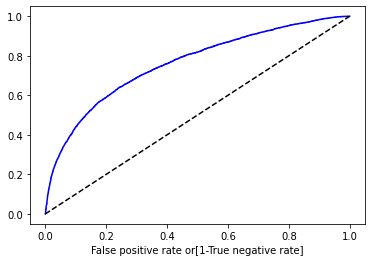

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold=roc_curve(y,LR.predict_proba(x)[:,1])
auc=roc_auc_score(y,YY)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='blue',label='logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate or[1-True negative rate]')

In [ ]:
auc

0.5705048648987288

By using Train_Test_Split

In [ ]:
array=bank.values

In [ ]:
x=array[:,[0,5,9,11,12,13,14]]
y=array[:,-1]
y=y.astype('int')

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True)

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
result_test=model.score(x_test,y_test)
result_test

0.9980095101183236

In [ ]:
result_train=model.score(x_train,y_train)
result_train

0.9982028312320284

In [ ]:
pred_model=model.predict_proba(x_test)

In [ ]:
pred

array([[0.90188811, 0.09811189],
       [0.88947988, 0.11052012],
       [0.86795442, 0.13204558],
       ...,
       [0.75688912, 0.24311088],
       [0.94167413, 0.05832587],
       [0.78046442, 0.21953558]])

In [ ]:
preds=model.predict(x_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cmx=confusion_matrix(y_test,preds)
cmx

array([[8737,   12],
       [   6,  288]])

In [ ]:
accuracy=((7833+176)/(7833+151+883+176))*100
accuracy

88.56574145748093

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8749
           1       0.96      0.98      0.97       294

    accuracy                           1.00      9043
   macro avg       0.98      0.99      0.98      9043
weighted avg       1.00      1.00      1.00      9043



Text(0, 0.5, 'True Positive Rate')

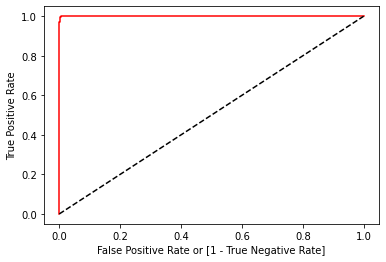

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, model.predict_proba (x)[:,1])

auc = roc_auc_score(y_test,preds)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


In [ ]:
auc

0.9891101257053284